## Observations and Insights

<ul>
<li>The correlation coefficient (r) for mouse weight and average tumor volume for the Capomulin regimen is calculated at .84.  This indicates a positive correlation between mouse weight and average tumor volume.   The r-squared for mouse weight and average tumor volume for the Capomulin regimen is calculated at 0.7088.  This indicates that approximately 71% if the observed variation can be explained by the model’s inputs.  In the linear regression model for mouse weight and average tumor volume for the Capomulin regimen, we can see the slope of the line is .95.  For each additional gram in mouse weight, we can expect the average tumor volume to increase by .95 mm3.</li>
<li>The Ramicane and Capomulin drug regimens resulted in the lowest final tumor volume compared to the Infubinol and Ceftamin drug regimens.  Infubinol is the only drug of the four that have outliers. </li>
<li>Capomulin and Ramicane drug regimens had the highest number of mice throughout the course of the study (230 and 228 respectively).  This indicates that more mice made it to the final timepoints compared to the other treatment regimens. </li>
</ul>


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")

# Display the data table for preview
merged_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [2]:
# Checking the number of mice
mice_count = merged_df["Mouse ID"].nunique()
mice_count

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint 
duplicates = merged_df[merged_df.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
duplicates

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [4]:
# Get all the data for the duplicate mouse ID 
mouse_g989 = merged_df[merged_df["Mouse ID"] =="g989"]
mouse_g989

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID
merged_df = merged_df.drop_duplicates(subset=["Mouse ID", "Timepoint"], keep="last")
merged_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
# Checking the number of mice in the clean DataFrame
mice_count = merged_df["Mouse ID"].nunique()
mice_count

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Group by Drug Regimen
grouped_regimen_df = merged_df.groupby(["Drug Regimen"])

#Calculate Tumor Volume Mean
tv_mean = grouped_regimen_df["Tumor Volume (mm3)"].mean()

#Calculate Tumor Volume Median
tv_median = grouped_regimen_df["Tumor Volume (mm3)"].median()


#Calculate Tumor Volume Variance
tv_var = grouped_regimen_df["Tumor Volume (mm3)"].var()

#Calculate Tumor Volume Standard Deviation
tv_sd = grouped_regimen_df["Tumor Volume (mm3)"].std()

#Calculate Tumor Volume SEM
tv_sem = grouped_regimen_df["Tumor Volume (mm3)"].sem()
                               
# This method is the most straighforward, creating multiple series and putting them all together at the end.
regimen_summary_table = pd.DataFrame({"Mean": tv_mean,
                                     "Median": tv_median,
                                     "Variance": tv_var,
                                     "Standard Deviation": tv_sd,
                                     "SEM": tv_sem})

regimen_summary_table


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.382993,50.783528,43.220205,6.574208,0.526358
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function

drug_regimen_summary = merged_df.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})

drug_regimen_summary

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.382993  50.783528  43.220205  6.574208  0.526358
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

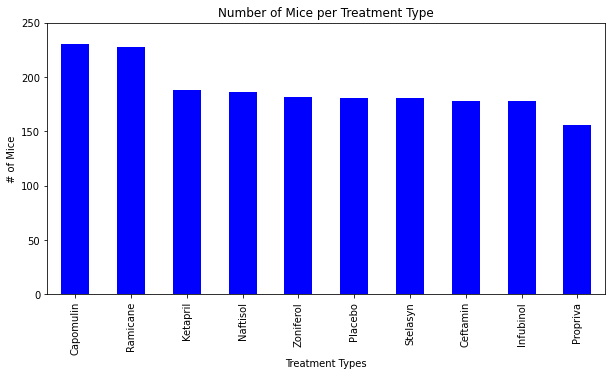

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas

# Get number of mice per treatment / drug regimen
treatment_data = merged_df["Drug Regimen"].value_counts()
treatment_data

# Create a bar chart of the data
treatment_data = treatment_data.sort_values(ascending=False)
treatment_data.plot(figsize=(10,5), kind="bar", facecolor="blue")

# Set title and axis labels for the chart
plt.title("Number of Mice per Treatment Type")
plt.ylabel("# of Mice")
plt.xlabel("Treatment Types")

# Set the chart Y limits
plt.ylim(0, 250)

plt.show()
plt.tight_layout

<function matplotlib.pyplot.show(*args, **kw)>

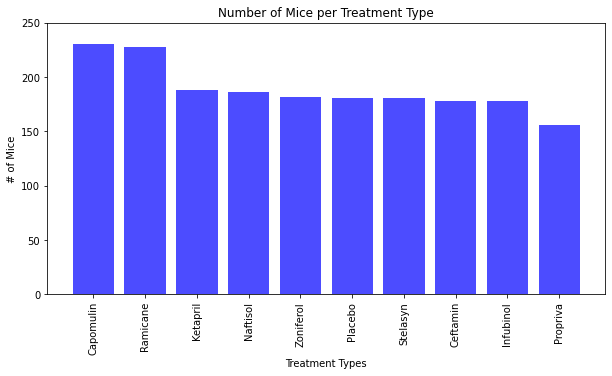

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

#define the size of the chart
plt.figure(figsize=(10,5))

#Create the bar chart
plt.bar(x=treatment_data.index.values, height=treatment_data.values, color='b',  alpha=0.7, align="center")

#Set title and axis labels 
plt.xticks(rotation=90)
plt.title("Number of Mice per Treatment Type")
plt.ylabel("# of Mice")
plt.xlabel("Treatment Types")

# Set the chart Y limits
plt.ylim(0, 250)

#Display the plot
plt.show


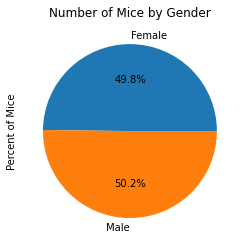

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# split the data into groups based on the Sex column
gender_groups = merged_df.groupby('Sex')

# identify the number of unique IDs are male vs female
gender_data = gender_groups["Mouse ID"].nunique()
#gender_data

#Generate the pie chart
gender_pie = gender_data.plot(kind="pie", title="Number of Mice by Gender", autopct='%1.1f%%')

#Set the Y label
gender_pie.set_ylabel("Percent of Mice")

#Show the chart
plt.show()


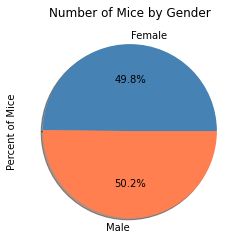

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# split the data into groups based on the Sex column
gender_groups1 = merged_df.groupby('Sex')

#Get labels for the different genders
labels = "Female", "Male"

# identify the number of unique IDs are male vs female
gender_data1 = gender_groups["Mouse ID"].nunique()

#Set the colors for the pie chart
colors = ["steelblue", "coral"]

#Create the pie chart
plt.pie(gender_data1, labels=labels, colors=colors, shadow=True, autopct='%1.1f%%', startangle=0)

#Set the title
plt.title("Number of Mice by Gender")

#Set the Y axis label
plt.ylabel("Percent of Mice")

#Show the chart
plt.show()



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

#find the max timepoint, get the tumor volume
timepoint_max = merged_df.loc[merged_df.groupby("Mouse ID")["Timepoint"].idxmax()]
#timepoint_max.head()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
combined_df = pd.merge(timepoint_max, merged_df, on=["Mouse ID", "Timepoint"], how="left")

# Keep only the columns needed for the dataframe
#combined_df = combined_df.loc[:,["Mouse ID", "Drug Regimen_x", "Sex_x", "Age_months_x", "Weight (g)_x", "Timepoint_x", "Tumor Volume (mm3)_x", "Metastatic Sites_x", "Tumor Volume (mm3)_y"]]
#combined_df = combined_df.loc[(combined_df["Drug Regimen_x"] =="Capomulin") | (combined_df["Drug Regimen_x"] == "Ramicane") | (combined_df["Drug Regimen_x"] == "Infubinol") | (combined_df["Drug Regimen_x"] == "Ceftamin"),["Mouse ID", "Drug Regimen_x", "Sex_x", "Age_months_x", "Weight (g)_x", "Timepoint_x", "Tumor Volume (mm3)_x", "Metastatic Sites_x", "Tumor Volume (mm3)_y"]]

# Rename the columns
#combined_df = combined_df.rename(columns={"Drug Regimen_x": "Drug Regimen", "Sex_x": "Sex", "Age_months_x": "Age_months", "Weight (g)_x": "Weight (g)", "Timepoint_x": "Timepoint", "Tumor Volume (mm3)_x": "Tumor Volume (mm3)", "Metastatic Sites_x": "Metastatic Sites", "Tumor Volume (mm3)_y":"Tumor Volume Last Timepoint"})

#Display the combined dataframe
combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3)_x,Metastatic Sites_x,Drug Regimen_x,Sex_x,Age_months_x,Weight (g)_x,Tumor Volume (mm3)_y,Metastatic Sites_y,Drug Regimen_y,Sex_y,Age_months_y,Weight (g)_y
0,a203,45,67.973419,2,Infubinol,Female,20,23,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29,63.440686,1,Stelasyn,Female,16,29


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
#treatment_list

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []
#tumor_vol_data

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for x in treatment_list:
        
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # In the combined_df, locate the drug and associated mouse
    tumor_volumesx = combined_df.loc[combined_df["Drug Regimen_x"] == x, "Tumor Volume (mm3)_x"]
    
    # add subset 
    tumor_vol_data.append(tumor_volumesx)


    # Determine outliers using upper and lower bounds

    quantiles = tumor_volumesx.quantile([.25,.5,.75])
    lowerq = quantiles[0.25]
    upperq = quantiles[0.75]
    iqr = upperq-lowerq

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    outliers = tumor_volumesx.loc[(tumor_volumesx < lower_bound) | (tumor_volumesx > upper_bound)]
    print(f"{x}'s potential outliers: {outliers}")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3)_x, dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3)_x, dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3)_x, dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3)_x, dtype: float64)


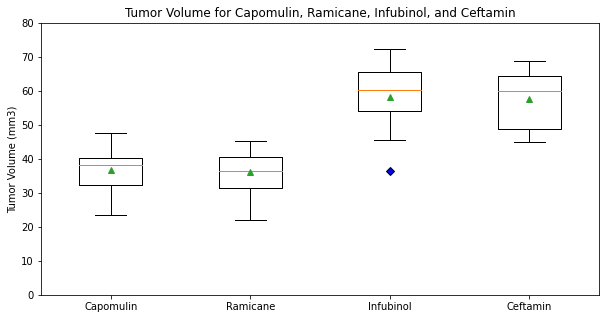

In [17]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

#Format of the outlier(s)
blue_diamond = dict(markerfacecolor='b', marker="D")

# Set the size of the plot (width, height) 
plt.figure(figsize=(10,5))

# Set title/labels
plt.title("Tumor Volume for Capomulin, Ramicane, Infubinol, and Ceftamin")
plt.ylabel("Tumor Volume (mm3)")

# Create boxplot
plt.boxplot(tumor_vol_data, labels=treatment_list, showmeans=True, flierprops=blue_diamond)

# Set the chart Y limits
plt.ylim(0, 80)

plt.show()

## Line and Scatter Plots

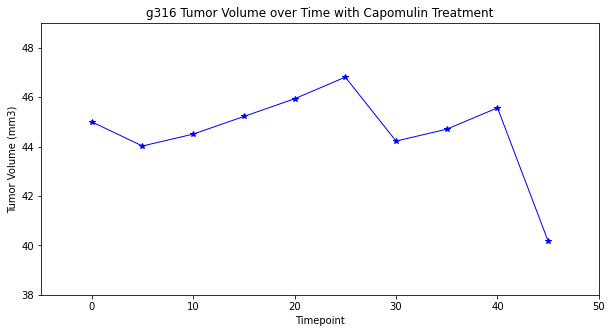

In [18]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

#filter for mouse ID g316 that has a treatment of Capomulin
mouse_g316 = merged_df.loc[merged_df["Mouse ID"] == "g316"]

# create x axis data
x_axis=np.arange(0,50, 5)

# Set th chart size
plt.figure(figsize=(10,5))

# Plot the data on a line graph
mouse_g316_handle = plt.plot(x_axis, mouse_g316["Tumor Volume (mm3)"],marker="*", color="blue", linewidth=1, label="mm3")

# Set the chart title
plt.title("g316 Tumor Volume over Time with Capomulin Treatment")

# Set the X and Y axis labels
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")

# Set the chart X and Y limits
plt.xlim(-5, 50)
plt.ylim(38, 49)

# Display the chart
plt.show()


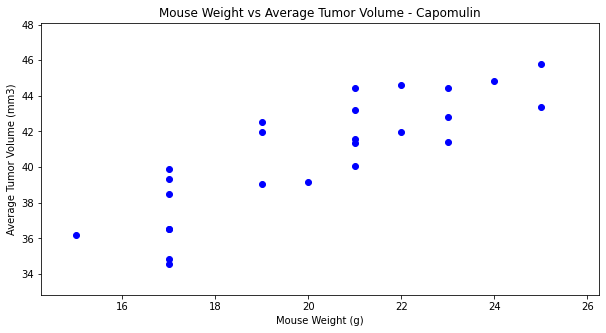

In [19]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

# Filter for drug regimen of Capomulin
cap_treatment = merged_df.loc[merged_df["Drug Regimen"] == "Capomulin"]

# Group filtered results by the mouse ID and weight
mouse_weight_group = cap_treatment.groupby(["Mouse ID", "Weight (g)"])

# Calculate the average tumor volume per mouse ID and weight
avg_weight = mouse_weight_group["Tumor Volume (mm3)"].mean().to_frame()

# Rename the column with the average data
avg_weight = avg_weight.rename(columns={"Tumor Volume (mm3)": "Avg Tumor Volume"})

# Reset the index
avg_weight = avg_weight.reset_index()

# Set the chart size
plt.figure(figsize=(10,5))

# Generate the scatter chart
plt.scatter(avg_weight["Weight (g)"], avg_weight["Avg Tumor Volume"], marker="o", facecolors="blue")

# Set the X and Y limits
plt.xlim(min(avg_weight["Weight (g)"])*0.95, max(avg_weight["Weight (g)"])*1.05)
plt.ylim(min(avg_weight["Avg Tumor Volume"])*0.95,max(avg_weight["Avg Tumor Volume"])*1.05)

# Set the chart title
plt.title("Mouse Weight vs Average Tumor Volume - Capomulin")

# Set the chart x and y labels
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

# Generate the chart
plt.show()

## Correlation and Regression

The correlation coefficient (r) is 0.84
The r-squared is: 0.7088568047708717
The p-value is 1.322572243471279e-07


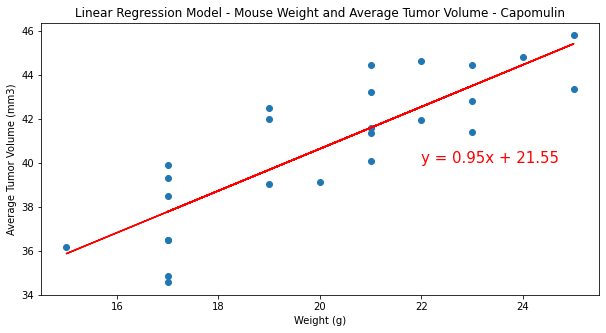

In [54]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

#Calculate Correlation
correlation = st.pearsonr(avg_weight["Weight (g)"], avg_weight["Avg Tumor Volume"])

x_values = avg_weight["Weight (g)"]
y_values = avg_weight["Avg Tumor Volume"]

# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

# Calculate the predictions for each value of x (# Rooms)
regression_values = x_values * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(10,5))
# Plot observations
plt.scatter(x_values, y_values)

# Plot the regression line
plt.plot(x_values, regression_values, "red")

# Annotate the plot with the linear equation
plt.annotate(line_eq, (22, 40), fontsize=15, color="red")
plt.title("Linear Regression Model - Mouse Weight and Average Tumor Volume - Capomulin")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

print(f"The correlation coefficient (r) is {round(correlation[0],2)}")
print(f"The r-squared is: {rvalue**2}")
print(f"The p-value is {correlation[1]}")

plt.show()